# Data Operations & Management Assignment 2

## Sinead Walsh - L00161930

## MSc. Data Science

# Spark Set Up

In [1]:
%%capture
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [3]:
from pyspark import SparkContext #tells the master node about the configuration in the apache spark.
from pyspark import SparkConf

In [4]:
#Setting up the Spark configuration:
conf = SparkConf().setAppName("My Spark App").setMaster("local") #Master will be local machine.
sc = SparkContext.getOrCreate(conf=conf) #All the confiuration starts here.
spark = SparkSession(sc)

# ELT

In [5]:
#Defined a function to extract the data from the semi-structured txt file based on what the lines start with.

def extract_data(start, end , path):
    with open(path) as f:
        for line in f:
            if line.startswith(start):
                result = []
                result.append(line.strip())
                for line in f:
                    if line.startswith(end):
                        break
                    result.append(line.strip())
    f.close()
    return(result)
     

In [6]:
#Extracted the data.

path = '/content/ElectionResults.txt'

data = extract_data(start='Electoral district number',end='*Type of results:', path=path )
data

['Electoral district number - Numéro de la circonscription\tElectoral district name\tNom de la circonscription\tType of results*\tType de résultats**\tSurname - Nom de famille\tMiddle name(s) - Autre(s) prénom(s)\tGiven name - Prénom\tPolitical affiliation\tAppartenance politique\tVotes obtained - Votes obtenus\t% Votes obtained - Votes obtenus %\tRejected ballots - Bulletins rejetés***\tTotal number of ballots cast - Nombre total de votes déposés',
 "35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tAl-Sudani\t\tKhaled\tPeople's Party - PPC\tParti populaire - PPC\t288\t1.2\t0\t24760",
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tAnderson\t\tMélodie\tIndependent\tIndépendant(e)\t29\t.1\t0\t24760',
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tBeaulieu\t\tMyriam\tIndependent\tIndépendant(e)\t16\t.1\t0\t24760',
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminar

In [7]:
#Split and stored the headers by the tab delimiter for renaming columns later.

import re

headers = data[0]
headers =  re.split('\t', headers)
headers

['Electoral district number - Numéro de la circonscription',
 'Electoral district name',
 'Nom de la circonscription',
 'Type of results*',
 'Type de résultats**',
 'Surname - Nom de famille',
 'Middle name(s) - Autre(s) prénom(s)',
 'Given name - Prénom',
 'Political affiliation',
 'Appartenance politique',
 'Votes obtained - Votes obtenus',
 '% Votes obtained - Votes obtenus %',
 'Rejected ballots - Bulletins rejetés***',
 'Total number of ballots cast - Nombre total de votes déposés']

In [8]:
#Removed the headers from the extracted data.

data = data[1:]
data

["35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tAl-Sudani\t\tKhaled\tPeople's Party - PPC\tParti populaire - PPC\t288\t1.2\t0\t24760",
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tAnderson\t\tMélodie\tIndependent\tIndépendant(e)\t29\t.1\t0\t24760',
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tBeaulieu\t\tMyriam\tIndependent\tIndépendant(e)\t16\t.1\t0\t24760',
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tBonneau\t\tMylène\tIndependent\tIndépendant(e)\t9\t0\t0\t24760',
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tBoudreault\t\tJean-Denis Parent\tIndependent\tIndépendant(e)\t8\t0\t0\t24760',
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tpreliminary\tpréliminaires\tBélanger\t\tLine\tIndependent\tIndépendant(e)\t8\t0\t0\t24760',
 '35061\tMississauga--Lakeshore\tMississauga--Lakeshore\tp

In [9]:
#Created an rdd by parallelising the extracted data.

rdd = sc.parallelize(data)

In [10]:
#Created a dataframe from the rdd/data and saved it to the cache memory.

from pyspark.sql.types import StringType

df = spark.createDataFrame(rdd, StringType()).cache()
df.show()

+--------------------+
|               value|
+--------------------+
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
|35061	Mississauga...|
+--------------------+
only showing top 20 rows



In [11]:
#Split the data into its separate columns using the tab delimiter and renamed them using the headers.

import pyspark.sql.functions as f

df = df.select(f.split(df[0], '\t').getItem(0).alias('Electoral district number'),
                f.split(df[0], '\t').getItem(1).alias('Electoral district name'),
                f.split(df[0], '\t').getItem(2).alias('Nom de la circonscription'),
                f.split(df[0], '\t').getItem(3).alias('Type of results*'),
                f.split(df[0], '\t').getItem(4).alias('Type de résultats**'),
                f.split(df[0], '\t').getItem(5).alias('Surname'),
                f.split(df[0], '\t').getItem(6).alias('Middle name(s)'),
                f.split(df[0], '\t').getItem(7).alias('Given name'),
                f.split(df[0], '\t').getItem(8).alias('Political affiliation'),
                f.split(df[0], '\t').getItem(9).alias('Appartenance politique'),
                f.split(df[0], '\t').getItem(10).alias('Votes obtained'),
                f.split(df[0], '\t').getItem(11).alias('% Votes obtained'),
                f.split(df[0], '\t').getItem(12).alias('Rejected ballots'),
                f.split(df[0], '\t').getItem(13).alias('Total number of ballots cast'))

df.show(truncate=False)

+-------------------------+-----------------------+-------------------------+----------------+-------------------+-----------+--------------+-----------------+----------------------+----------------------+--------------+----------------+----------------+----------------------------+
|Electoral district number|Electoral district name|Nom de la circonscription|Type of results*|Type de résultats**|Surname    |Middle name(s)|Given name       |Political affiliation |Appartenance politique|Votes obtained|% Votes obtained|Rejected ballots|Total number of ballots cast|
+-------------------------+-----------------------+-------------------------+----------------+-------------------+-----------+--------------+-----------------+----------------------+----------------------+--------------+----------------+----------------+----------------------------+
|35061                    |Mississauga--Lakeshore |Mississauga--Lakeshore   |preliminary     |préliminaires      |Al-Sudani  |              |Khaled 

In [12]:
#Dropped unwanted columns (french translations and empty columns).

cols_to_drop = ['Nom de la circonscription', 'Type de résultats**', 'Middle name(s)', 'Appartenance politique', 'Total number of ballots cast']

for col in cols_to_drop:
  df = df.drop(col)

df.show(truncate=False)

+-------------------------+-----------------------+----------------+-----------+-----------------+----------------------+--------------+----------------+----------------+
|Electoral district number|Electoral district name|Type of results*|Surname    |Given name       |Political affiliation |Votes obtained|% Votes obtained|Rejected ballots|
+-------------------------+-----------------------+----------------+-----------+-----------------+----------------------+--------------+----------------+----------------+
|35061                    |Mississauga--Lakeshore |preliminary     |Al-Sudani  |Khaled           |People's Party - PPC  |288           |1.2             |0               |
|35061                    |Mississauga--Lakeshore |preliminary     |Anderson   |Mélodie          |Independent           |29            |.1              |0               |
|35061                    |Mississauga--Lakeshore |preliminary     |Beaulieu   |Myriam           |Independent           |16            |.1       

In [13]:
#Cast string type to integer type for relevant columns.

from pyspark.sql.types import FloatType, IntegerType

df = df.withColumn("Votes obtained", df["Votes obtained"].cast(IntegerType()))\
      .withColumn("% Votes obtained", df["% Votes obtained"].cast(FloatType()))\
      .withColumn("Rejected ballots", df["Rejected ballots"].cast(IntegerType()))

df.printSchema()

root
 |-- Electoral district number: string (nullable = true)
 |-- Electoral district name: string (nullable = true)
 |-- Type of results*: string (nullable = true)
 |-- Surname: string (nullable = true)
 |-- Given name: string (nullable = true)
 |-- Political affiliation: string (nullable = true)
 |-- Votes obtained: integer (nullable = true)
 |-- % Votes obtained: float (nullable = true)
 |-- Rejected ballots: integer (nullable = true)



# Data Analysis

In [15]:
#Determined who the top 5 candidates were.

TopCandidates = df.filter(f.col('Type of results*')=='validated')
TopCandidates = TopCandidates.select('Surname', 'Given name', 'Votes obtained', 'Political affiliation')
TopCandidates = TopCandidates.withColumnRenamed('Votes obtained', 'Validated Votes Obtained')
TopCandidates = TopCandidates.select(f.concat_ws(' ' , f.col("Given name"), f.col("Surname")).alias("Full Name"), f.col('Political affiliation'), f.col('Validated Votes Obtained'))
TopCandidates = TopCandidates.select(f.concat_ws(' - ' , f.col("Full Name"), f.col("Political affiliation")).alias("Candidate"), f.col('Validated Votes Obtained'))
TopCandidates.orderBy('Validated Votes Obtained', ascending=False).show(5, truncate=False)


+---------------------------------------+------------------------+
|Candidate                              |Validated Votes Obtained|
+---------------------------------------+------------------------+
|Charles Sousa - Liberal                |12766                   |
|Ron Chhinzer - Conservative            |9215                    |
|Julia Kole - NDP-New Democratic Party  |1231                    |
|Mary Kidnew - Green Party              |792                     |
|Khaled Al-Sudani - People's Party - PPC|293                     |
+---------------------------------------+------------------------+
only showing top 5 rows



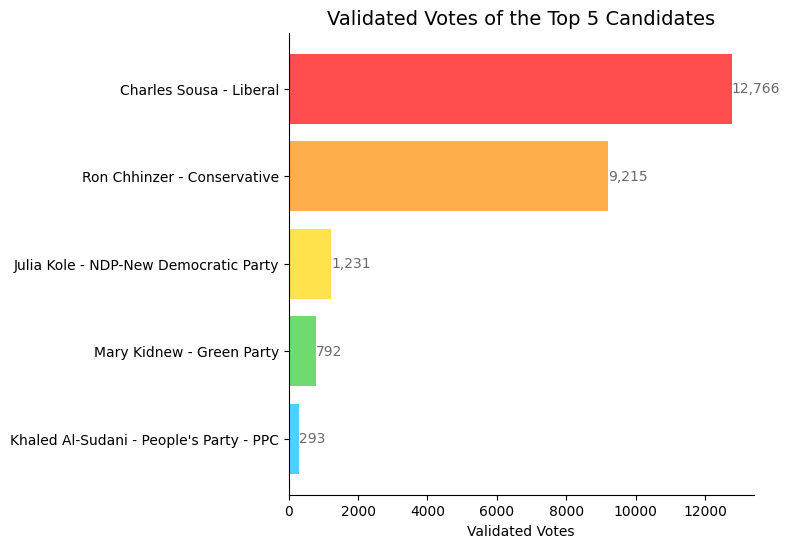

In [16]:
#Visualised the top 5 candidates in a horizontal bar chart.

import matplotlib.pyplot as plt

names=TopCandidates.orderBy('Validated Votes Obtained', ascending=False).rdd.map(lambda x: x['Candidate']).take(5)
values=TopCandidates.orderBy('Validated Votes Obtained', ascending=False).rdd.map(lambda x: x['Validated Votes Obtained']).take(5)


barhcolors = ['red', 'darkorange','gold', 'limegreen', 'deepskyblue', 'blueviolet', 'magenta']

fig, ax = plt.subplots(figsize=(6,6))
bars = plt.barh(names, values, color=barhcolors, alpha=0.7)
ax.bar_label(bars, color='dimgrey', fmt='{:,.0f}')
ax.spines[['right', 'top']].set_visible(False) 
plt.title("Validated Votes of the Top 5 Candidates", fontsize=14)
plt.xlabel('Validated Votes', fontsize=10)
ax.invert_yaxis()
plt.show()


In [17]:
#Summed the total validated votes for each party to determine the top 5 parties.

AffiliationBreakdown = df.filter(f.col('Type of results*')=='validated').groupBy('Political affiliation').sum('% Votes obtained')
AffiliationBreakdown = AffiliationBreakdown.withColumnRenamed('sum(% Votes obtained)', '% Validated Votes Obtained')
AffiliationBreakdown.orderBy('% Validated Votes Obtained', ascending=False).show(5, truncate=False)

+------------------------+--------------------------+
|Political affiliation   |% Validated Votes Obtained|
+------------------------+--------------------------+
|Liberal                 |51.400001525878906        |
|Conservative            |37.099998474121094        |
|NDP-New Democratic Party|5.0                       |
|Green Party             |3.200000047683716         |
|Independent             |1.600000023841858         |
+------------------------+--------------------------+
only showing top 5 rows



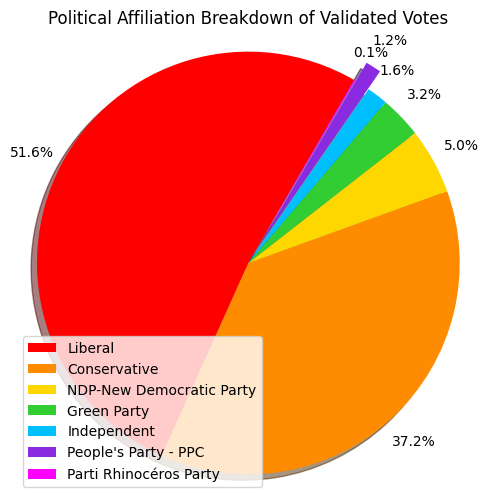

In [18]:
#Plotted the % validated votes for each party in a pie chart.

labels=AffiliationBreakdown.orderBy('% Validated Votes Obtained', ascending=False).rdd.map(lambda x: x['Political affiliation']).collect()
values=AffiliationBreakdown.orderBy('% Validated Votes Obtained', ascending=False).rdd.map(lambda x: x['% Validated Votes Obtained']).collect()


fig, ax = plt.subplots(figsize=(6,6))
my_colors = ['red', 'darkorange','gold', 'limegreen', 'deepskyblue', 'blueviolet', 'magenta']
my_explode = (0, 0, 0, 0, 0, 0.1, 0)
plt.pie(values, labels=labels, startangle=60, pctdistance=1.15, autopct='%1.1f%%', shadow=True, colors=my_colors, explode= my_explode, labeldistance=None)
plt.title("Political Affiliation Breakdown of Validated Votes")
plt.legend(labels, loc="lower left")
plt.axis('equal')
plt.show()


In [19]:
#Determined which independant politician obtained the most validated votes.

TopInd = df.filter((f.col('Type of results*')=='validated')& (f.col('Political affiliation')=='Independent'))
TopInd = TopInd.select(f.concat_ws(' ' , f.col("Given name"), f.col("Surname")).alias("Full Name"), f.col("Votes obtained").alias("Validated Votes Obtained"))
TopInd.orderBy('Validated Votes Obtained', ascending=False).show(5, truncate=False)

+--------------------+------------------------+
|Full Name           |Validated Votes Obtained|
+--------------------+------------------------+
|Sean Carson         |48                      |
|Charles Currie      |44                      |
|Patrick Strzalkowski|38                      |
|Peter House         |31                      |
|Mélodie Anderson    |29                      |
+--------------------+------------------------+
only showing top 5 rows



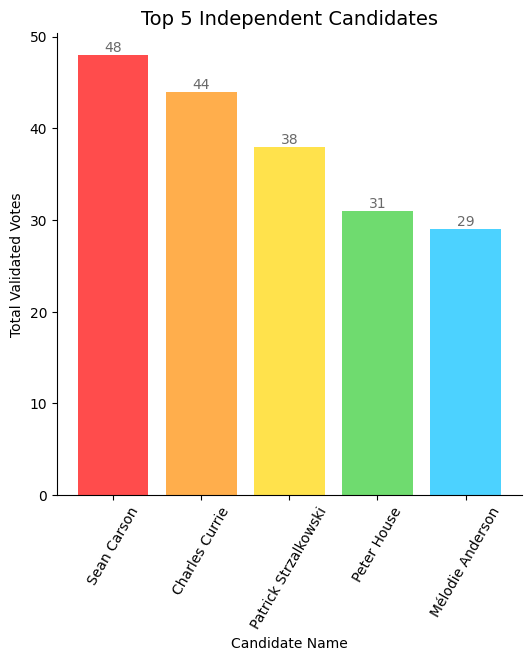

In [20]:
#Plotted total validated votes for the top 5 independant candidates.

labels=TopInd.orderBy('Validated Votes Obtained', ascending=False)\
.rdd.map(lambda x: x['Full Name']).take(5)
values=TopInd.orderBy('Validated Votes Obtained', ascending=False)\
.rdd.map(lambda x: x['Validated Votes Obtained']).take(5)


barcolors = ['red', 'darkorange','gold', 'limegreen', 'deepskyblue', 'blueviolet', 'magenta']

fig, ax = plt.subplots(figsize=(6,6))
bars = plt.bar(labels, values, color=barcolors, alpha=0.7)
ax.bar_label(bars, color='dimgrey', fmt='{:,.0f}')
ax.spines[['right', 'top']].set_visible(False) 
plt.title('Top 5 Independent Candidates', fontsize=14)
plt.xlabel('Candidate Name', fontsize=10)
plt.ylabel('Total Validated Votes', fontsize=10)
plt.xticks(rotation=60)
plt.show()


# Time & Scale Analysis

In [24]:
import time

In [25]:
#Created the schema for the cleaned & transformed df.

from pyspark.sql.types import StructType,StructField

Schema = StructType([
    StructField("Electoral district number",StringType(),True),
    StructField("Electoral district name",StringType(),True),
    StructField("Type of results*",StringType(),True),
    StructField("Surname", StringType(), True),
    StructField("Given name", StringType(), True),
    StructField("Political affiliation", StringType(), True),
    StructField("Votes obtained", IntegerType(), True),
    StructField("% Votes obtained", FloatType(), True),
    StructField("Rejected ballots", IntegerType(), True) ])

In [26]:
#Timed the execution of operations using different numbers of cores.

masters= ["local[1]", "local[2]", "local[3]", "local[4]"]
avgexec_time = []

for master in masters:
  conf = SparkConf().setAppName("My Spark App").setMaster(master) 
  sc = SparkContext.getOrCreate(conf=conf) 
  spark = SparkSession(sc)
  rdd = df.rdd
  data = rdd.collect()
  rdd = sc.parallelize(data)
  df = spark.createDataFrame(rdd, schema=Schema).cache()
  start_time = time.time()
  for i in range(1001):
    df.filter(f.col('Type of results*')=='validated').groupBy('Political affiliation').sum('% Votes obtained')\
    .withColumnRenamed('sum(% Votes obtained)', '% Validated Votes Obtained').orderBy('sum(% Votes obtained)', ascending=False)
  end_time = time.time()
  avgexec_time.append(((end_time-start_time)/1000))

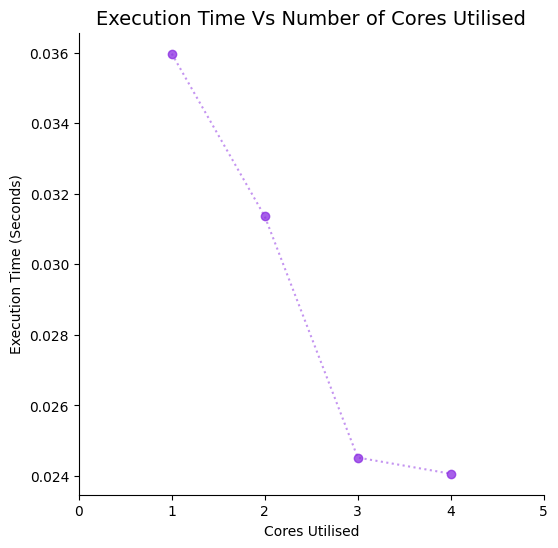

In [27]:
#Plotted execution time vs number of cores.

cores = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(cores, avgexec_time, c='blueviolet', alpha =0.75)
plt.plot(cores, avgexec_time, c='blueviolet', linestyle='dotted', alpha=0.5)
ax.spines[['right', 'top']].set_visible(False) 
plt.title('Execution Time Vs Number of Cores Utilised', fontsize=14)
plt.xlabel('Cores Utilised', fontsize=10)
plt.ylabel('Execution Time (Seconds)', fontsize=10)
plt.xlim(0, 5)
plt.show()

In [32]:
#Recorded execution time for different partition numbers with 3 cores.

partitions = range(1,11)
num_partitions = []
avg_execution_time = []

conf = SparkConf().setAppName("My Spark App").setMaster('local[3]')
sc = SparkContext.getOrCreate(conf=conf) 
spark = SparkSession(sc)
rdd = df.rdd
data = rdd.collect()
rdd = sc.parallelize(data)
df = spark.createDataFrame(rdd, schema=Schema).cache()

for p in partitions:
    df = df.repartition(p).cache()
    num_partitions.append(df.rdd.getNumPartitions())
    start_time = time.time()
    for i in range(1001):
      df.filter(f.col('Type of results*')=='validated').groupBy('Political affiliation').sum('% Votes obtained')\
      .withColumnRenamed('sum(% Votes obtained)', '% Validated Votes Obtained').orderBy('sum(% Votes obtained)', ascending=False)
      end_time = time.time()
    avg_execution_time.append(((end_time-start_time)/1000))

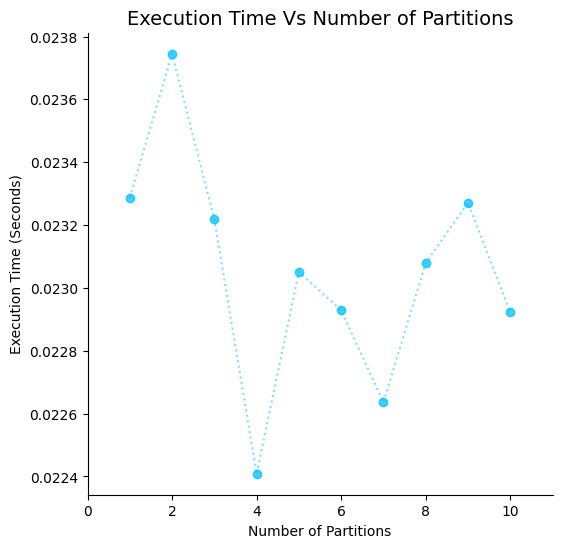

In [33]:
#Plotted execution time vs number of partitions.


fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(num_partitions, avg_execution_time, c='deepskyblue', alpha =0.75)
plt.plot(num_partitions, avg_execution_time, c='deepskyblue', linestyle='dotted', alpha=0.5)
ax.spines[['right', 'top']].set_visible(False) 
plt.title('Execution Time Vs Number of Partitions', fontsize=14)
plt.xlabel('Number of Partitions', fontsize=10)
plt.ylabel('Execution Time (Seconds)', fontsize=10)
plt.xlim(0, 11)
plt.show()